# Лабораторная работа №3
# Розно Константин 18-ИВТ-2 Вариант 19

### Цель лабораторной работы – получение навыков работы с методами регрессии



### 1. Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).
### 2. Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;
### 3. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);
### 4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;
### 5. Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других;
### 6. Заполните пропущенные значения в данных;
### 7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

Набор классификаторов:
1 – линейная регрессия без использования регуляризаторов;
2 – линейная регрессия, LASSO регуляризатор;


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import (train_test_split)
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from  sklearn import linear_model
%matplotlib inline
import warnings

In [31]:
df = pd.read_csv("airfoil_self_noise.dat.txt",sep="\t")

In [32]:
df.head()

,freq,ang,chord,Velocity,Ssdt,PresLvl
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [33]:
df.columns

Index(['freq', 'ang', 'chord', 'Velocity', 'Ssdt', 'PresLvl'], dtype='object')

## 1

##### 1. freq - Frequency - частота (в герцах)
##### 2. ang - Angle of attack - Угол удара (в градусах)
##### 3. chord - Chord length - Длина хорды (в метрах)
##### 4. Velocity - Free-stream velocity - Скорость свободного потока (в м/с)
##### 5. Ssdt - Suction side displacement thickness - Толщина смещения на стороне всасывания (в метрах)
##### 6. PresLvl -  Scaled sound pressure level - Машстабированный уровень звукового давления (в децибелах)


In [34]:
df.shape

(1503, 6)

### 2

In [35]:
df.drop_duplicates(keep="first", inplace=True)
df.dropna

<bound method DataFrame.dropna of       freq   ang   chord  Velocity      Ssdt  PresLvl
0      800   0.0  0.3048      71.3  0.002663  126.201
1     1000   0.0  0.3048      71.3  0.002663  125.201
2     1250   0.0  0.3048      71.3  0.002663  125.951
3     1600   0.0  0.3048      71.3  0.002663  127.591
4     2000   0.0  0.3048      71.3  0.002663  127.461
...    ...   ...     ...       ...       ...      ...
1498  2500  15.6  0.1016      39.6  0.052849  110.264
1499  3150  15.6  0.1016      39.6  0.052849  109.254
1500  4000  15.6  0.1016      39.6  0.052849  106.604
1501  5000  15.6  0.1016      39.6  0.052849  106.224
1502  6300  15.6  0.1016      39.6  0.052849  104.204

[1503 rows x 6 columns]>

In [36]:
df.shape

(1503, 6)

### 3

In [37]:
numerical_columns   = ['freq', 'ang', 'chord', 
                       'Velocity', 'Ssdt', 'PresLvl']
print (f"Числовые признаки: {numerical_columns}")

Числовые признаки: ['freq', 'ang', 'chord', 'Velocity', 'Ssdt', 'PresLvl']


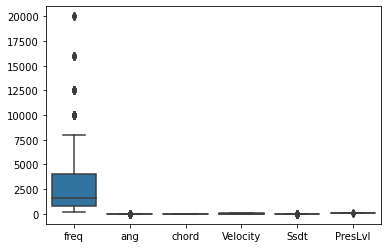

In [38]:
sns.boxplot(data=df[numerical_columns])
plt.show()

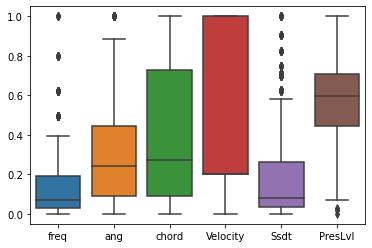

In [39]:
df[numerical_columns] = MinMaxScaler().fit_transform(df[numerical_columns].values.astype(float))
sns.boxplot(data = df[numerical_columns])
plt.show()

### 4

In [40]:
df.nunique()

freq          21
ang           27
chord          6
Velocity       4
Ssdt         105
PresLvl     1456
dtype: int64

#### Категориальных признаков нет

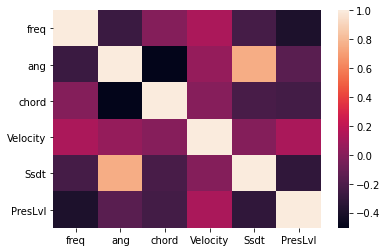

In [41]:
sns.heatmap(df.corr())

### 6

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freq      1503 non-null   float64
 1   ang       1503 non-null   float64
 2   chord     1503 non-null   float64
 3   Velocity  1503 non-null   float64
 4   Ssdt      1503 non-null   float64
 5   PresLvl   1503 non-null   float64
dtypes: float64(6)
memory usage: 82.2 KB


### 7 

In [43]:
# Линейная регрессия без использования регуляризаторов
x, y = df.drop(['freq'], axis=1), df['freq']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)
pred_reg = reg.predict(x_test)
print(pred_reg[:15] - y_test[:15])

61     -0.024157
1025   -0.228608
1333    0.048023
817     0.042195
725     0.236355
569     0.074047
1019    0.181611
1023   -0.126704
256    -0.064481
1079   -0.088629
1401    0.006241
28     -0.287186
712     0.044564
981    -0.471656
196    -0.067363
Name: freq, dtype: float64


In [44]:
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.6848137930947014 p_value: 1.0669886433688039e-63
Spearmen correlation: 0.6841072472816374 p_value: 1.6070334978842746e-63


In [45]:
# Линейная регрессия, LASSO регуляризатор
x, y = df.drop(['freq'], axis=1), df['freq']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 123)

lasso = Lasso(alpha=0.1)
lasso.fit(x_train,y_train)
pred_reg = lasso.predict(x_test)
print(pred_reg[:15] - y_test[:15])

61     -0.055247
1025   -0.257268
1333    0.106369
817    -0.055247
725     0.106369
569     0.126571
1019    0.045763
1023   -0.105752
256    -0.257268
1079   -0.105752
1401    0.083642
28     -0.484540
712     0.126571
981    -0.661308
196    -0.257268
Name: freq, dtype: float64


In [47]:
P, p_value_P = pearsonr(pred_reg, y_test)
S, p_value_S = spearmanr(pred_reg, y_test)
print(f"Pearson correlation: {P} p_value: {p_value_P}\nSpearmen correlation: {S} p_value: {p_value_S}")

Pearson correlation: 0.6849317106558622 p_value: 9.963824613686225e-64
Spearmen correlation: 0.6838715845963388 p_value: 1.8417815511354629e-63
